# Networks: Friends, Epidemics & Terrorists
## Network Science: An Example Study

The goal of this handout is to show you an example network science application. Please note that the interpretations in this network can be improved. In your assignments you can use more network metrics. And, you should provide a better interpretation of your data.

In [1]:
# Make sure you run this code cell everytime you open the notebook!
import networkx as nx            # Import NetworkX library as nx for its network functions
import numpy as np               # Import NumPy library as np for its mathematical functions
import matplotlib.pyplot as plt  # Import Matplotlib library as plt for its plotting functions
import matplotlib as mplt        # Import Matplotlib library as plt for its plotting functions

## DATASETS: ACQUAINTANCE NETWORK

This is thea acquaintance network I created using the data I collected from the class. We will first create the network, and then use NetworkX package to analyze this network.

In [2]:
# Acquaintance network for Networks class members
AG = nx.Graph([("T", "H"), ("T", "J"), ("J", "S"), ("J", "U"), ("J", "X"),("E", "M"),  ("E", "Q"),("M", "Q"),\
              ("K", "C"), ("K", "L"), ("K", "O"), ("K", "Q"), ("K", "S"), ("K", "T"), \
              ("H", "E"), ("H", "I"), ("H", "N"),("A", "B"), ("A", "H"), ("A", "O"), ("A", "P"), ("A", "R"),\
              ("I", "A"), ("I", "K"), ("I", "O"), ("I", "R"), ("I", "S"), ("I", "W"),\
              ("F", "A"), ("F", "B"), ("F", "G"), ("F", "H"), ("F", "M"), ("F", "T"),("G", "A"), ("G", "I"), ("G", "O"),\
              ("L", "W"),("W", "A"), ("W", "B"), ("W", "K"), ("V", "J"), ("V", "X"), \
              ("O", "R"), ("O", "S"), ("B", "G"), ("B", "K"), ("B", "O"), ("B", "R"),\
              ("D", "M"), ("D", "U")])

##  A NETWORK PLOTTING FUNCTION

In [18]:
# A function for simple plotting
def plot_graph(G):
  pos = nx.drawing.spring_layout(G, iterations=15, seed=1721)
  plt.figure(figsize=(10,10))                                                             # Specify the figure size
  nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green')   # The figure properties
  plt.show()   

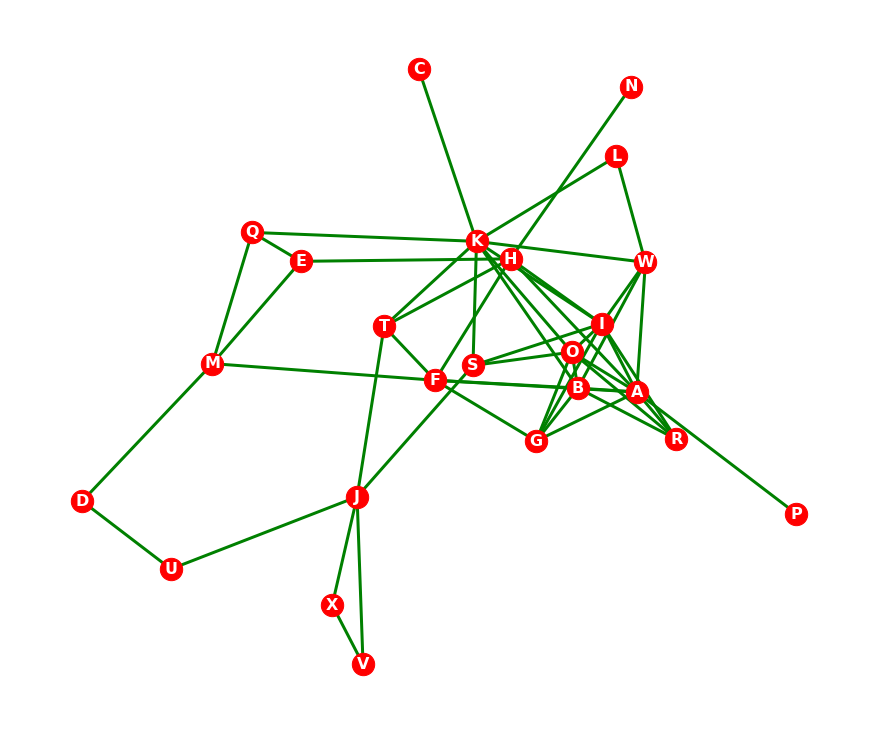

In [4]:
# Visualize the acquaintance network
plot_graph(AG)

## Analysis of the Acquaintance Network

In this handout we will provide a simple analysis of the acquintance network. You can similarly analyze other networks.

In [5]:
print("Total number of nodes: ", AG.number_of_nodes())                 # Print the number of nodes (N) 
print("Total number of links: ", AG.number_of_edges())                 # Print the number of links (L)
print("Average Degree: ", 2*AG.number_of_edges()/AG.number_of_nodes()) # Average degree (<k>) = 2*L / N

Total number of nodes:  24
Total number of links:  51
Average Degree:  4.25


***INTERPRETATION:*** This network has 24 nodes with 51 links. Average degree for this network is 4.25. This indicates that in average each person knows 4.25 people. 

## Network Analysis: Distance (K degrees of seperation)

Lets calculate the length of the shortest paths between a node and all other nodes, between two nodes, average shortest path, and the diameter of the network.

In [6]:
print("Shortest path length between node A and all other nodes:", nx.shortest_path_length(AG, source="A"))   # Shortest path length between node A and all other nodes
print("Shortest path length between nodes A and M:", nx.shortest_path_length(AG, source="A", target="M"))    # Shortest path length between node A and M
print("The average path length of the network: ", nx.average_shortest_path_length(AG))                       # Average Path Length     
print("The diameter of the network: ", nx.diameter(AG))                                                      # Diameter

Shortest path length between node A and all other nodes: {'A': 0, 'R': 1, 'W': 1, 'O': 1, 'P': 1, 'B': 1, 'F': 1, 'H': 1, 'G': 1, 'I': 1, 'N': 2, 'K': 2, 'T': 2, 'L': 2, 'M': 2, 'E': 2, 'S': 2, 'C': 3, 'J': 3, 'D': 3, 'Q': 3, 'V': 4, 'U': 4, 'X': 4}
Shortest path length between nodes A and M: 2
The average path length of the network:  2.4565217391304346
The diameter of the network:  5


***INTERPRETATION:*** Student A can reach all other students with at most 4 links. For example, student A can reach student M with only 2 links. The average path length between two students in this class is 2.5, which is way less than 6 degrees of freedom suggested for social networks. The highest distance between two students in this network is 5.

## Network Analysis: Connected Components

In [7]:
components = list(nx.connected_components(AG))
print("The number of connected components in Graph AG is:", len(components))             # Number of components
print("The largest connected component is: ", max(components, key=len))                  # Largest component
print("This network is connected?: ", nx.is_connected(AG))                               # Check for connectedness                                                           # Check whether the network is connected

The number of connected components in Graph AG is: 1
The largest connected component is:  {'R', 'C', 'N', 'B', 'F', 'L', 'D', 'X', 'T', 'Q', 'I', 'V', 'W', 'K', 'P', 'U', 'A', 'H', 'S', 'O', 'J', 'M', 'E', 'G'}
This network is connected?:  True


***INTERPRETATION:*** This acquaintance network only has one connected component. Thus, every student can be connected to another student in the class.

## Network Analysis: Bridges

A bridge in a network is a link whose removal causes the number of connected components of the network to increase. The existence of a bridge implies that two groups of people are only connected through a single link, and the removal of that link will disconnect the two groups. 

Lets find the list of bridges and bridge components, and interpret our findings.

In [9]:
print("The bridges in Graph AG is:",list(nx.bridges(AG, root=None)))
from networkx.algorithms.connectivity.edge_kcomponents import bridge_components
print("The bridge components in Graph AG is:",sorted(map(sorted, bridge_components(AG))))

The bridges in Graph AG is: [('H', 'N'), ('K', 'C'), ('A', 'P')]
The bridge components in Graph AG is: [['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'O', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], ['C'], ['N'], ['P']]


***INTERPRETATION:*** In this network the links between H and N; K and C; A and P are important. Without these links students C, N and P will be isolated in the class.

## Network Analysis: Clustering Coefficient

Lets calculate the clustering coefficient and the average clustering coefficient in this network.

In [11]:
clustering_coefs=nx.clustering(AG)
print("The local clustering coefficients of all nodes ", dict(sorted(clustering_coefs.items(), key=lambda item: item[1], reverse=True)[0:5]))  # The top 5 students with highest local clustering coefficients
print("Average clustering coefficient: ", nx.average_clustering(AG))                     # Average clustering coefficient

The local clustering coefficients of all nodes  {'X': 1.0, 'L': 1.0, 'V': 1.0, 'R': 0.8333333333333334, 'G': 0.7}
Average clustering coefficient:  0.38293650793650796


***INTERPRETATION:*** In this class the average local clustering coefficient is 0.38. This means that in average 40% of neighbors of a student know each other. The students X, L and V have the highest local clustering coefficient, meaning that all the people they know are acquainted with each other also.

## Network Analysis: Centrality

In a social network, the centrality scores assigned to a particular person can be useful in determining the significance of the individual in that network.
First, lets find the centrality of all of the nodes in the network, and then interpret our findings.

In [13]:
centralities=nx.degree_centrality(AG)        # Three students with the highest degree centrality values.
print('Top 3 Degree Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:3])) 

centralities=nx.harmonic_centrality(AG)      # Three students with the highest closeness centrality values. 
print('Top 3 Harmonic Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:3]))

centralities=nx.betweenness_centrality(AG)   # Three students with the highest betweenness centrality values. 
print('Top 3 Betweenness Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:3]))

centralities=nx.pagerank(AG)                 # Three students with the highest pagerank centrality values. 
print('Top 3 PageRank Centrality Scores:', dict(sorted(centralities.items(), key=lambda item: item[1], reverse=True)[0:3]))

Top 3 Degree Centrality Scores: {'K': 0.3913043478260869, 'A': 0.3913043478260869, 'I': 0.34782608695652173}
Top 3 Harmonic Centrality Scores: {'K': 15.000000000000004, 'I': 14.583333333333334, 'A': 14.583333333333334}
Top 3 Betweenness Centrality Scores: {'K': 0.2474998431520171, 'J': 0.23370663153271845, 'H': 0.15328125980299892}
Top 3 PageRank Centrality Scores: {'K': 0.08206707676118427, 'A': 0.07714951472861506, 'I': 0.06695553564305165}


***INTERPRETATION:*** Student K has the highest centrality scores for degree, harmonic, betweenness, and pagerank centrality. This suggests that in this network he/she has the highest number of links (i.e., popular). He/she is the closest to all other students meaning that he/she can distribute the information fastest. He/she is the bridge person for many people. He/she does not only have the highest number of connections, but also he/she is connected to students with high number of connections. Students A and I are the second and third students based on degree, harmonic and page rank centralities. Students J and H are the second and third based on betweenness centrality. Overall, these five people are the central people in this social network.


## Network Analysis: Cliques

In [14]:
cliques = list(nx.find_cliques(AG))
print("Number of non-trivial clique(s) in G: ", len(sorted(comps for comps in cliques if len(comps) > 2)))           # The cliques with more than two nodes for G
clique_lengths = [len(i) for i in cliques]
print("Largest clique(s) in AG: ", sorted(comps for comps in cliques if len(comps) == max(clique_lengths) ))        # The largest clique(s) of network G

Number of non-trivial clique(s) in G:  17
Largest clique(s) in AG:  [['A', 'B', 'G', 'O'], ['A', 'I', 'G', 'O'], ['F', 'A', 'G', 'B'], ['K', 'O', 'I', 'S'], ['R', 'O', 'A', 'B'], ['R', 'O', 'A', 'I']]


***Interpretation*** In this network we have 17 non-trivial cliqiues. We have 6 cliques with 4 people in it. Students A and O are a member of five of these cliques. Students B, G and I are a member of 3 of these cliques.

## Assortativity: By Degree

Since we are not using an unordered or ordered attribute for the students I cannot check assortativity by attribute. However, we can check assortativity by degree. Please note that one can calculate attribute assortativity using an attribute such as class year, race and major.

In [19]:
# A plotting function where you can plot a network with different colors of nodes
def plot_graph_nodecolor(G):
  pos = nx.drawing.spring_layout(G)
  plt.figure(figsize=(10,10))                                                               # Specify the figure size
  nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, \
        node_color=color_map, font_size=20, font_color='white',width=3, edge_color='green') # The figure properties
  plt.show()                                                                                # Show the network

Assortativity based on degree: 0.00939849624060152


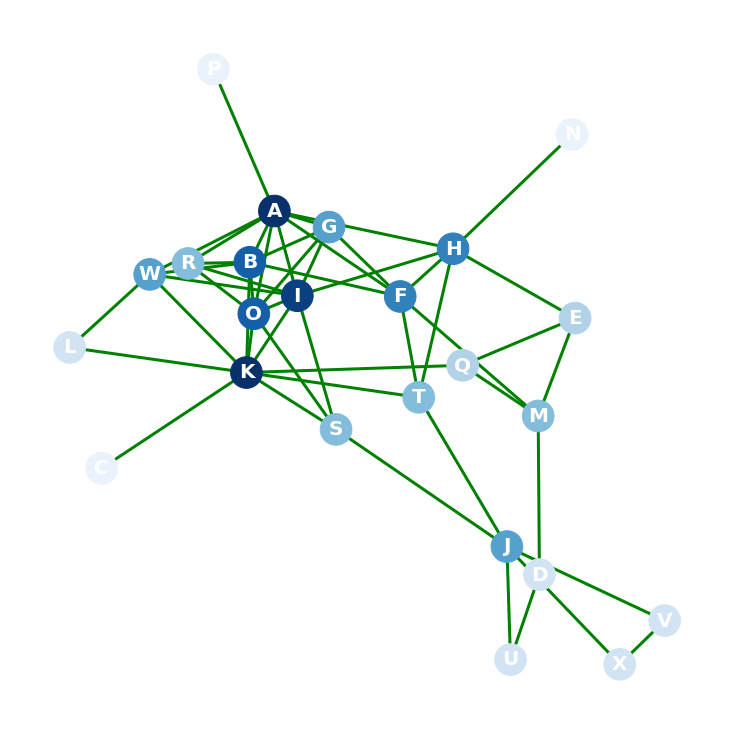

In [20]:
colors = [val for (node, val) in AG.degree()] # Create the color map based on the degree of nodes
#nodes = [node for (node, val) in AG.degree()] # Create the color map based on the degree of nodes
color_map=[]
norm = mplt.colors.Normalize(vmin=min(colors), vmax=max(colors))
cmap = mplt.cm.ScalarMappable(norm=norm, cmap=mplt.cm.Blues)
for node in range(0,AG.number_of_nodes()):
    color_map.append(cmap.to_rgba(colors[node]+0.5))

print("Assortativity based on degree:", nx.degree_assortativity_coefficient(AG)) # Print assortativity based on degree
plot_graph_nodecolor(AG)     

***INTERPRETATION:*** In this network assortativity based on degree is 0.009, which is low. Thus we can suggest that students who have high degree are often linked to students who has low degree in thsi network. 